# Replica project

### Plotting model results


In [8]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, "../model/")
from utils import *

sys.path.insert(0, "../web_annotation/")
from utils_clusters import *
from metrics_clusters import * 


data_dir = '/scratch/students/schaerf/'
data_dir = '../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Pre trained models

In [2]:
## look at pretrained notebook

### Different model settings training

In [8]:
# original loss
for subfolder_dir in ['01-05-2022', '10-05-2022']:
    print('old loss')
    if subfolder_dir == '01-05-2022':
        data = pd.read_csv(data_dir + subfolder_dir + '/dedup_data_sample_wga_translated.csv')
    elif subfolder_dir == '10-05-2022':
        data = pd.read_csv(data_dir + subfolder_dir + '/data_wga_cini_45000.csv')
    else:
        data = pd.read_csv(data_dir + 'data_sample.csv')
    positives = data[data['set'].isin(['train', 'val', 'test'])]
    embeds_file = subfolder_dir + '/resnext-101_'+subfolder_dir+'.npy'
    embeds = np.load(data_dir + embeds_file, allow_pickle=True) 
    
    print(subfolder_dir, )
    get_scores(embeds, data, positives, reverse_map=True)

# new loss
# for subfolder_dir in ['25-05-2022']:
#     print('new loss')
#     embeds_file = subfolder_dir + '/resnext-101_'+subfolder_dir+'.npy'
#     embeds = np.load(data_dir + embeds_file, allow_pickle=True) 
    
#     print(subfolder_dir, )
#     get_scores(embeds, data, positives, reverse_map=True)


old loss
01-05-2022


100%|██████████| 14948/14948 [02:41<00:00, 92.64it/s] 


all positions 223.37084305384016
min positions 63.72653884964682
median positions 232.8042381432896
mean average precision 0.34056312386537213
recall @ 400 0.7574841196269578
recall @ 200 0.6923068764164946
recall @ 100 0.6169857206542638
recall @ 50 0.5472993585008297
recall @ 20 0.4509459614390837
old loss
10-05-2022


100%|██████████| 24128/24128 [04:28<00:00, 89.80it/s]  


all positions 244.62201793721974
min positions 69.34638255698711
median positions 264.5406342913776
mean average precision 0.3036291154889735
recall @ 400 0.7164010777965449
recall @ 200 0.6472417542842925
recall @ 100 0.5647670881011604
recall @ 50 0.49239262308351034
recall @ 20 0.41071945951451455


### Retraining from new annotations

Annotation based scores

In [97]:
for subfolder_dir in ['25-05-2022', '28-05-2022', '01-06-2022']:
    embeds_file = subfolder_dir + '/resnext-101_'+subfolder_dir+'.npy'
    data = pd.read_csv(data_dir + data_file)
    embeds = np.load(data_dir + embeds_file, allow_pickle=True) 
    
    print(subfolder_dir, )
    get_scores(embeds, data, positives, reverse_map=True)


25-05-2022


100%|██████████| 13028/13028 [01:08<00:00, 189.20it/s]


all positions 200.63960298654268
min positions 63.51210898082745
median positions 205.69374369323916
mean average precision 0.42130403841280356
recall @ 400 0.77763527381736
recall @ 200 0.7180536846504237
recall @ 100 0.6583113652859789
recall @ 50 0.5929899953228329
recall @ 20 0.5058607889858885
28-05-2022


100%|██████████| 13028/13028 [01:08<00:00, 190.35it/s]


all positions 203.44011266598113
min positions 62.32139253279516
median positions 206.63925327951563
mean average precision 0.4041070277315487
recall @ 400 0.7653663023411815
recall @ 200 0.7272548861374608
recall @ 100 0.6520562339478639
recall @ 50 0.5890477673405604
recall @ 20 0.49320241250773944
01-06-2022


100%|██████████| 13028/13028 [01:02<00:00, 207.57it/s]


all positions 205.89131309518487
min positions 61.12865792129163
median positions 210.72073662966702
mean average precision 0.40791816048701385
recall @ 400 0.7829580650169901
recall @ 200 0.720258031442242
recall @ 100 0.65470614163455
recall @ 50 0.5832405151719773
recall @ 20 0.4948517078250467


### Epoch learning

In [2]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')


In [5]:
scores = pd.read_csv(data_dir + 'scores_all.csv').set_index('Unnamed: 0')
scores.style.format('{:.3f}').apply(highlight_max, props='color:white;background-color:blue', axis=0, subset=['map', 'recall_400', 'recall_200', 'recall_100', 'recall_50', 'recall_20', ]
).apply(highlight_min, props='color:white;background-color:blue', axis=0, subset=['mean_position', 'mean_min_position', 'mean_median_position'])

,mean_position,mean_min_position,mean_median_position,map,recall_400,recall_200,recall_100,recall_50,recall_20
Unnamed: 0,,,,,,,,,
0,287.439,126.273,338.564,0.129,0.525,0.427,0.334,0.264,0.188
1,247.755,83.635,276.509,0.237,0.680,0.594,0.519,0.445,0.340
2,243.485,77.206,269.121,0.251,0.698,0.616,0.540,0.461,0.364
3,247.480,73.711,274.573,0.261,0.693,0.614,0.542,0.465,0.365
4,250.303,76.593,279.302,0.249,0.682,0.613,0.527,0.450,0.348
5,238.168,66.881,261.106,0.289,0.715,0.646,0.579,0.504,0.398
6,240.082,75.653,266.873,0.260,0.695,0.617,0.539,0.472,0.369
7,238.015,76.219,262.798,0.260,0.698,0.620,0.539,0.464,0.368
8,233.987,76.268,256.225,0.271,0.692,0.628,0.553,0.466,0.374


<AxesSubplot:xlabel='Unnamed: 0', ylabel='recall_400'>

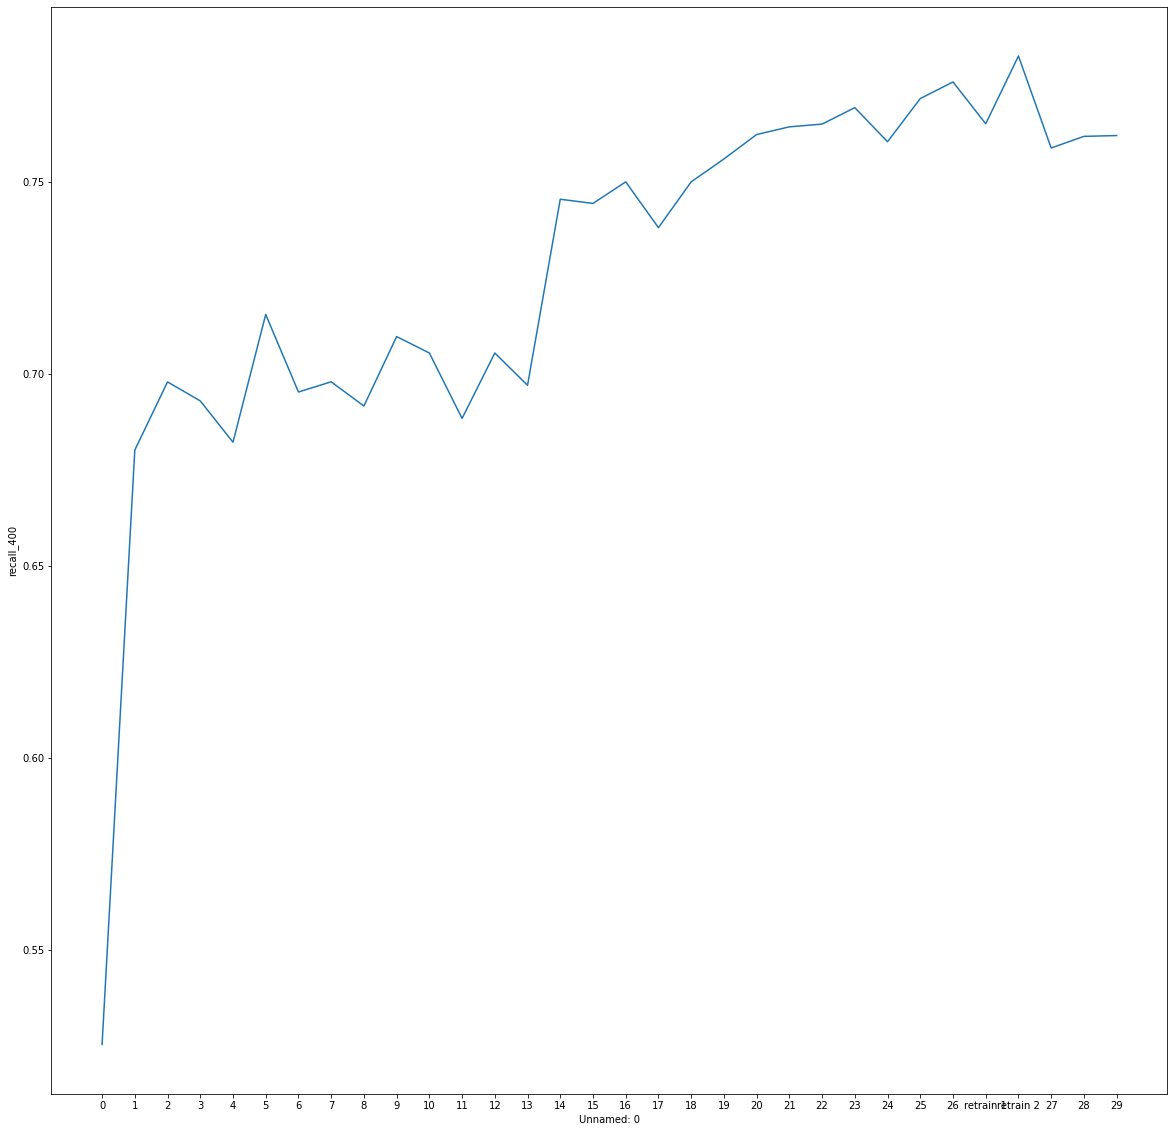

In [14]:
plt.subplots(figsize=(20,20))
sns.lineplot(x='Unnamed: 0', y='recall_400', data=scores, )